<a href="https://colab.research.google.com/github/joelsaxena/AIMLMonth2023/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Modules**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

# **Loading the Dataset**

In [ ]:
!wget -O HindenBerg_Report.csv "https://www.dropbox.com/scl/fi/g445ntavlys2pwvclt39s/HindenBerg_Report.csv?rlkey=uxalbnmr6izvt8sh45ixtdeq8&dl=0"
data = pd.read_csv('HindenBerg_Report.csv')
data.head()

--2023-09-08 04:36:59--  https://www.dropbox.com/scl/fi/g445ntavlys2pwvclt39s/HindenBerg_Report.csv?rlkey=uxalbnmr6izvt8sh45ixtdeq8&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/e/scl/fi/g445ntavlys2pwvclt39s/HindenBerg_Report.csv?rlkey=uxalbnmr6izvt8sh45ixtdeq8&dl=0 [following]
--2023-09-08 04:36:59--  https://www.dropbox.com/e/scl/fi/g445ntavlys2pwvclt39s/HindenBerg_Report.csv?rlkey=uxalbnmr6izvt8sh45ixtdeq8&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfd5c17ad750e64f4a73d20070a.dl.dropboxusercontent.com/cd/0/inline/CDVaepi-btwfpl62vDU5d_2oExlfXz0JLHcSoxQZcVO_bH-zmNA2BDw72xFqPuLUbiQYBKUn3n8FNxYQ7JtFdvSXu4HW8IqxTU-XUVJQLYZrzRNqdirQJHj6vsZVBduHLOZJ4soO1nDIux53e7bC8jZf/file# [following]
--2023-09-08

NameError: ignored

In [ ]:
# datatype info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1002 non-null   int64 
 1   date        1002 non-null   object
 2   id          1002 non-null   int64 
 3   Tweets      1002 non-null   object
 4   likes       1002 non-null   int64 
 5   retweets    1002 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.1+ KB


# **Preprocessing the Dataset**

**Removing pattern in input text**

In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt
data.head()

,Unnamed: 0,date,id,Tweets,likes,retweets
0,0,2023-02-07 10:44:03+00:00,1622909048017375232,@hegade_u @JhaSanjay Let this Jha2 read carefu...,0,0
1,1,2023-02-07 10:30:27+00:00,1622905625163481089,@CursedSe7en @Memeghnad Yes and like RG bashed...,0,0
2,2,2023-02-07 10:19:54+00:00,1622902969892220929,@_pallavighosh ji So @RahulGandhi has spoken o...,0,0
3,3,2023-02-07 10:12:47+00:00,1622901179343843328,With so much venom being spewed by Congress dy...,0,0
4,4,2023-02-07 10:01:35+00:00,1622898358758293510,Hindenberg is banned by SEC from participating...,2,0


**Removing twitter handles**

In [ ]:
def remove_twitter_handles(text):
    pattern = r'@[A-Za-z0-9_]+'
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text
df = pd.DataFrame(data)
df['Clean_Tweets'] = df['Tweets'].apply(remove_twitter_handles)
df.head()

,Unnamed: 0,date,id,Tweets,likes,retweets,Clean_Tweets
0,0,2023-02-07 10:44:03+00:00,1622909048017375232,@hegade_u @JhaSanjay Let this Jha2 read carefu...,0,0,"Let this Jha2 read carefully drafted "" legal..."
1,1,2023-02-07 10:30:27+00:00,1622905625163481089,@CursedSe7en @Memeghnad Yes and like RG bashed...,0,0,"Yes and like RG bashed Adani, Modi should al..."
2,2,2023-02-07 10:19:54+00:00,1622902969892220929,@_pallavighosh ji So @RahulGandhi has spoken o...,0,0,ji So has spoken on Hindenberg Report as wel...
3,3,2023-02-07 10:12:47+00:00,1622901179343843328,With so much venom being spewed by Congress dy...,0,0,With so much venom being spewed by Congress dy...
4,4,2023-02-07 10:01:35+00:00,1622898358758293510,Hindenberg is banned by SEC from participating...,2,0,Hindenberg is banned by SEC from participating...


**Removing special characters, numbers and punctuations**

In [ ]:
data['Clean_Tweets'] = data['Clean_Tweets'].str.replace("[^a-zA-Z#]", " ")
data.head()

,Unnamed: 0,date,id,Tweets,likes,retweets,Clean_Tweets
0,0,2023-02-07 10:44:03+00:00,1622909048017375232,@hegade_u @JhaSanjay Let this Jha2 read carefu...,0,0,Let this Jha read carefully drafted legal...
1,1,2023-02-07 10:30:27+00:00,1622905625163481089,@CursedSe7en @Memeghnad Yes and like RG bashed...,0,0,Yes and like RG bashed Adani Modi should al...
2,2,2023-02-07 10:19:54+00:00,1622902969892220929,@_pallavighosh ji So @RahulGandhi has spoken o...,0,0,ji So has spoken on Hindenberg Report as wel...
3,3,2023-02-07 10:12:47+00:00,1622901179343843328,With so much venom being spewed by Congress dy...,0,0,With so much venom being spewed by Congress dy...
4,4,2023-02-07 10:01:35+00:00,1622898358758293510,Hindenberg is banned by SEC from participating...,2,0,Hindenberg is banned by SEC from participating...


**Removing the stopwords**

In [ ]:
!pip install nltk

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)
data['Clean_Tweets'] = data['Clean_Tweets'].apply(remove_stopwords)
data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Unnamed: 0,date,id,Tweets,likes,retweets,Clean_Tweets
0,0,2023-02-07 10:44:03+00:00,1622909048017375232,@hegade_u @JhaSanjay Let this Jha2 read carefu...,0,0,Let Jha read carefully drafted legal disclaime...
1,1,2023-02-07 10:30:27+00:00,1622905625163481089,@CursedSe7en @Memeghnad Yes and like RG bashed...,0,0,Yes like RG bashed Adani Modi also bash Adani ...
2,2,2023-02-07 10:19:54+00:00,1622902969892220929,@_pallavighosh ji So @RahulGandhi has spoken o...,0,0,ji spoken Hindenberg Report well parliament
3,3,2023-02-07 10:12:47+00:00,1622901179343843328,With so much venom being spewed by Congress dy...,0,0,much venom spewed Congress dynast Adani group ...
4,4,2023-02-07 10:01:35+00:00,1622898358758293510,Hindenberg is banned by SEC from participating...,2,0,Hindenberg banned SEC participating US markets...


**Removing short words**

In [ ]:
data['Clean_Tweets'] = data['Clean_Tweets'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
data.head()

,Unnamed: 0,date,id,Tweets,likes,retweets,Clean_Tweets
0,0,2023-02-07 10:44:03+00:00,1622909048017375232,@hegade_u @JhaSanjay Let this Jha2 read carefu...,0,0,read carefully drafted legal disclaimer Hinden...
1,1,2023-02-07 10:30:27+00:00,1622905625163481089,@CursedSe7en @Memeghnad Yes and like RG bashed...,0,0,like bashed Adani Modi also bash Adani Forget ...
2,2,2023-02-07 10:19:54+00:00,1622902969892220929,@_pallavighosh ji So @RahulGandhi has spoken o...,0,0,spoken Hindenberg Report well parliament
3,3,2023-02-07 10:12:47+00:00,1622901179343843328,With so much venom being spewed by Congress dy...,0,0,much venom spewed Congress dynast Adani group ...
4,4,2023-02-07 10:01:35+00:00,1622898358758293510,Hindenberg is banned by SEC from participating...,2,0,Hindenberg banned participating markets also t...


**Taking individual words as tokens**

In [ ]:
Tokenized_Tweets = data['Clean_Tweets'].apply(lambda x: x.split())
Tokenized_Tweets.head()

0    [read, carefully, drafted, legal, disclaimer, ...
1    [like, bashed, Adani, Modi, also, bash, Adani,...
2       [spoken, Hindenberg, Report, well, parliament]
3    [much, venom, spewed, Congress, dynast, Adani,...
4    [Hindenberg, banned, participating, markets, a...
Name: Clean_Tweets, dtype: object

**Lemmatizing the words**

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
Tokenized_Tweets= Tokenized_Tweets.apply(lambda x: lemmatizer_on_text(x))
Tokenized_Tweets.head()

0    [read, carefully, drafted, legal, disclaimer, ...
1    [like, bashed, Adani, Modi, also, bash, Adani,...
2       [spoken, Hindenberg, Report, well, parliament]
3    [much, venom, spewed, Congress, dynast, Adani,...
4    [Hindenberg, banned, participating, markets, a...
Name: Clean_Tweets, dtype: object

**Combining words into single sentence**

In [ ]:
for i in range(len(Tokenized_Tweets)):
    Tokenized_Tweets[i] = " ".join(Tokenized_Tweets[i])
data['Clean_Tweets'] = Tokenized_Tweets

In [ ]:
from PIL import Image
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
for index, row in data['Clean_Tweets'].iteritems():
	score = SentimentIntensityAnalyzer().polarity_scores(row)
	neg = score['neg']
	neu = score['neu']
	pos = score['pos']
	comp = score['compound']

	if neg > pos:
		data.loc[index, 'sentiment'] = "negative"
	elif pos > neg:
		data.loc[index, 'sentiment'] = "positive"
	else:
		data.loc[index, 'sentiment'] = "neutral"

	data.loc[index, 'neg'] = neg
	data.loc[index, 'neu'] = neu
	data.loc[index, 'pos'] = pos
	data.loc[index, 'compound'] = comp


In [ ]:
total_pos = len(data.loc[data['sentiment'] == "positive"])
total_neg = len(data.loc[data['sentiment'] == "negative"])
total_neu = len(data.loc[data['sentiment'] == "neutral"])
total_tweets = len(data)
print("Total Positive Tweets % : {:.2f}"
	.format((total_pos/total_tweets)*100))
print("Total Negative Tweets % : {:.2f}"
	.format((total_neg/total_tweets)*100))
print("Total Neutral Tweets % : {:.2f}"
	.format((total_neu/total_tweets)*100))


Total Positive Tweets % : 39.92
Total Negative Tweets % : 29.24
Total Neutral Tweets % : 30.84


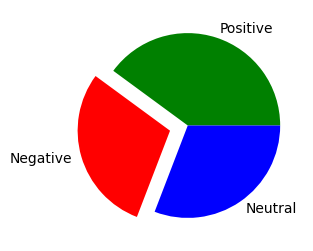

In [ ]:
mylabels = ["Positive", "Negative", "Neutral"]
mycolors = ["Green", "Red", "Blue"]

plt.figure(figsize=(5,3),
		dpi=100) # Push new figure on stack
myexplode = [0, 0.2, 0]
plt.pie([total_pos, total_neg, total_neu], colors=mycolors,
		labels=mylabels, explode=myexplode)
plt.show()


In [ ]:
from wordcloud import WordCloud

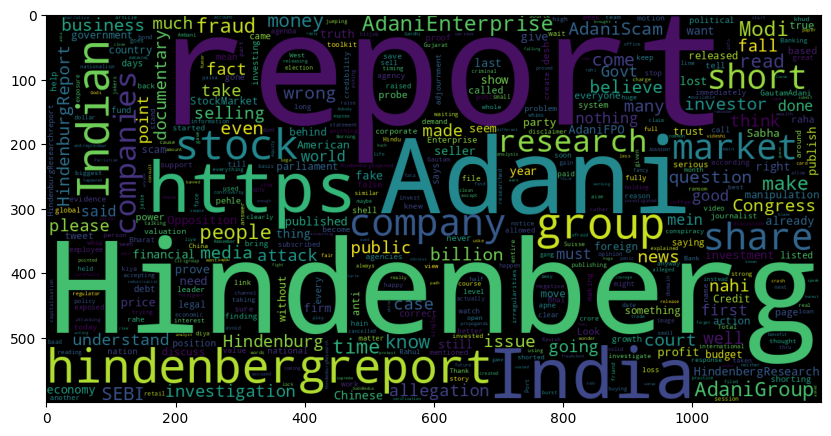

In [ ]:
data_plt = data['Clean_Tweets'][:1002]
plt.figure(figsize = (10,10))
wc = WordCloud(max_words = 500, width = 1200 , height = 600,
               collocations=False).generate(" ".join(data_plt))
plt.imshow(wc)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
data['sentiment']=le.fit_transform(data['sentiment'])

In [ ]:
text, sentiment = list(data['Clean_Tweets']), list(data['sentiment'])
df=data[['Clean_Tweets','sentiment']]

In [ ]:
data['Clean_Tweets']

0       read carefully drafted legal disclaimer Hinden...
1       like bashed Adani Modi also bash Adani Forget ...
2                spoken Hindenberg Report well parliament
3       much venom spewed Congress dynast Adani group ...
4       Hindenberg banned participating markets also t...
                              ...                        
997                     hindenberg report class sayllebus
998     soon lose crown Asia wealthiest person longtim...
999     discredit India Remember BarkhaDutt pictures a...
1000         Pappus short stock believe hindenberg report
1001    People read Hindenberg report Adani response c...
Name: Clean_Tweets, Length: 1002, dtype: object

In [ ]:
df.head()

,Clean_Tweets,sentiment
0,read carefully drafted legal disclaimer Hinden...,2
1,like bashed Adani Modi also bash Adani Forget ...,2
2,spoken Hindenberg Report well parliament,2
3,much venom spewed Congress dynast Adani group ...,2
4,Hindenberg banned participating markets also t...,0


In [ ]:
X=df['Clean_Tweets']
y=df['sentiment']

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26)


In [ ]:
!pip install textaugment

from textaugment import Wordnet
import random

aug = Wordnet()

def augment_text(text):
    return aug.augment(text)

augmented_data = [augment_text(text) for text in X_train]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Applying Countvectorizer
countVectorizer = CountVectorizer()
countVector = countVectorizer.fit_transform(data["Clean_Tweets"])
count_vect_df = pd.DataFrame(
	countVector.toarray(),
columns=countVectorizer.get_feature_names_out())
count_vect_df.head()

# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,
							ascending=False).head(20)
countdf[1:11]

,0
hindenberg,934
adani,579
https,192
india,190
hindenbergreport,123
group,108
indian,94
company,81
market,67
short,63


In [ ]:
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,
							ascending=False).head(175)
countdf

,0
report,971
hindenberg,934
adani,579
https,192
india,190
...,...
around,11
comes,11
agency,11
moves,11


In [ ]:
countVectorizer = CountVectorizer(ngram_range=(1,1),max_features=170)
countVectorizer.fit(X_train)
X_train1= countVectorizer.transform(X_train)
X_test1= countVectorizer.transform(X_test)


In [ ]:
def model_Evaluate(model):
  # Predict values for Test dataset
  y_pred = model.predict(X_test1)
  # Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))
  # Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix,annot = True, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.42      0.42      0.42        12
           1       0.50      0.61      0.55        18
           2       0.71      0.57      0.63        21

    accuracy                           0.55        51
   macro avg       0.54      0.53      0.53        51
weighted avg       0.57      0.55      0.55        51



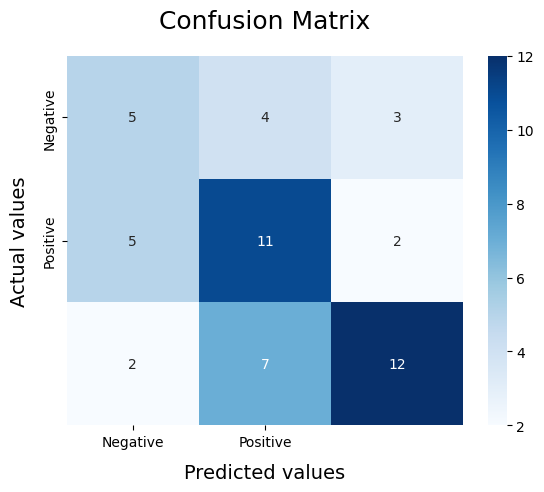

In [ ]:
model = BernoulliNB()
model.fit(X_train1, y_train)
y_pred =model.predict(X_test1)
model_Evaluate(model)

In [ ]:
model.score(X_test1,y_test)

0.5490196078431373

In [ ]:
model.score(X_train1,y_train)

0.7024185068349106

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test,y_pred,average='weighted')
recall= recall_score(y_test,y_pred,average='weighted')
f1=f1_score(y_test,y_pred,average='weighted')
accuracy,precision,f1,recall

(0.5490196078431373,
 0.5651672433679354,
 0.5522187822497421,
 0.5490196078431373)

              precision    recall  f1-score   support

           0       0.31      0.33      0.32        12
           1       0.48      0.56      0.51        18
           2       0.71      0.57      0.63        21

    accuracy                           0.51        51
   macro avg       0.50      0.49      0.49        51
weighted avg       0.53      0.51      0.52        51



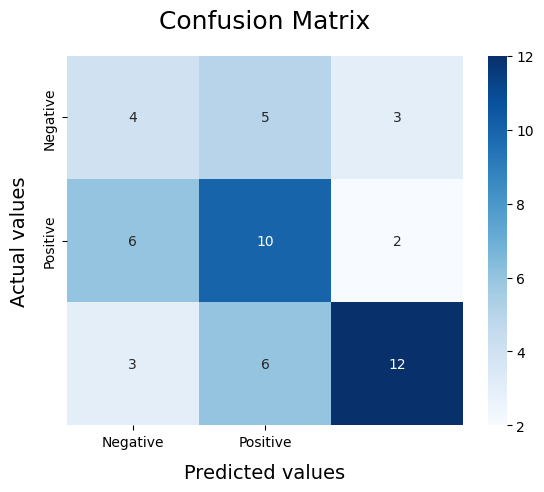

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train1, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test1)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
accuracy=accuracy_score(y_test,y_pred2)
precision =precision_score(y_test,y_pred2,average='weighted')
recall= recall_score(y_test,y_pred2,average='weighted')
f1=f1_score(y_test,y_pred2,average='weighted')
accuracy,precision,recall,f1

(0.5098039215686274, 0.531122856382372, 0.5098039215686274, 0.516351512264825)

In [ ]:
SVCmodel.score(X_test1,y_test)

0.5098039215686274

In [ ]:
SVCmodel.score(X_train1,y_train)

0.7886435331230284

              precision    recall  f1-score   support

           0       0.29      0.33      0.31        12
           1       0.50      0.61      0.55        18
           2       0.80      0.57      0.67        21

    accuracy                           0.53        51
   macro avg       0.53      0.51      0.51        51
weighted avg       0.57      0.53      0.54        51



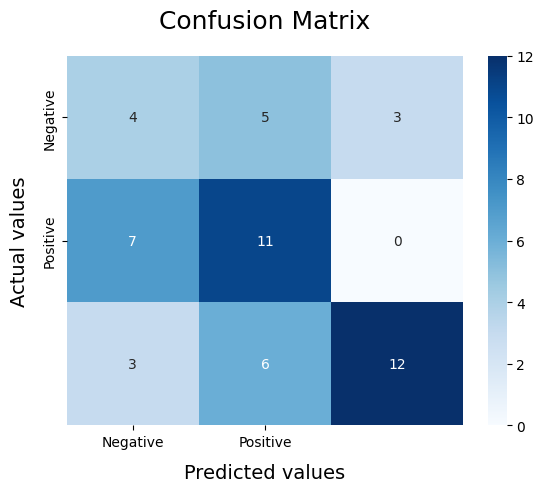

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train1, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test1)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
accuracy=accuracy_score(y_test,y_pred3)
precision =precision_score(y_test,y_pred3,average='weighted')
recall= recall_score(y_test,y_pred3,average='weighted')
f1=f1_score(y_test,y_pred3,average='weighted')
accuracy,precision,recall,f1

(0.5294117647058824, 0.573109243697479, 0.5294117647058824, 0.541025641025641)

In [ ]:
LRmodel.score(X_test1,y_test)

0.5294117647058824

In [ ]:
LRmodel.score(X_train1,y_train)

0.7886435331230284

In [ ]:
#Transforming the Dataset Using TF-IDF Vectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=170)
vectoriser.fit(X_train)


TfidfVectorizer(max_features=170, ngram_range=(1, 2))

In [ ]:
X_train2=vectoriser.transform(X_train)
X_test2=vectoriser.transform(X_test)

In [ ]:
def model_Evaluate(model):
  # Predict values for Test dataset
  y_pred = model.predict(X_test2)
  # Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))
  # Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix,annot = True, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.45      0.42      0.43        12
           1       0.52      0.67      0.59        18
           2       0.65      0.52      0.58        21

    accuracy                           0.55        51
   macro avg       0.54      0.54      0.53        51
weighted avg       0.56      0.55      0.55        51



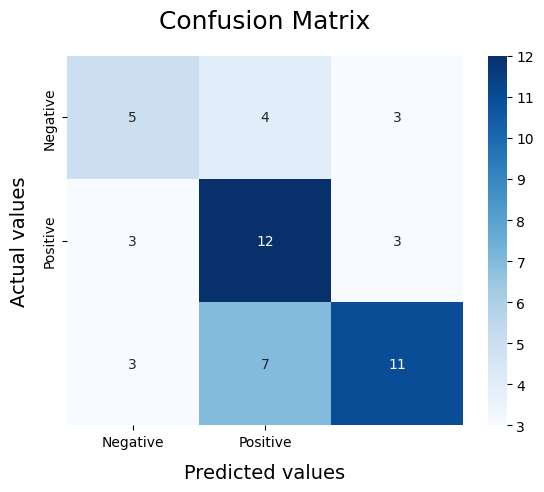

In [ ]:
model = BernoulliNB()
model.fit(X_train2, y_train)
y_pred4 =model.predict(X_test2)
model_Evaluate(model)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
accuracy=accuracy_score(y_test,y_pred4)
precision =precision_score(y_test,y_pred4,average='weighted')
recall= recall_score(y_test,y_pred4,average='weighted')
f1=f1_score(y_test,y_pred4,average='weighted')
accuracy,precision,recall,f1

(0.5490196078431373, 0.5575310803233174, 0.5490196078431373, 0.547291596216541)

In [ ]:
model.score(X_test2,y_test)

0.5490196078431373

In [ ]:
model.score(X_train2,y_train)

0.6898002103049422

              precision    recall  f1-score   support

           0       0.38      0.50      0.43        12
           1       0.55      0.67      0.60        18
           2       0.77      0.48      0.59        21

    accuracy                           0.55        51
   macro avg       0.56      0.55      0.54        51
weighted avg       0.60      0.55      0.55        51



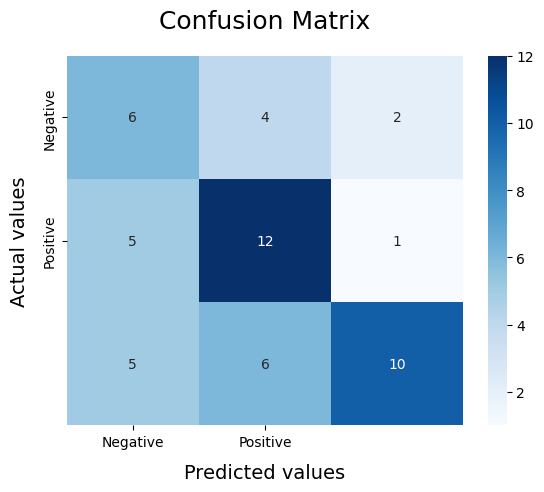

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train2, y_train)
model_Evaluate(SVCmodel)
y_pred5 = SVCmodel.predict(X_test2)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
accuracy=accuracy_score(y_test,y_pred5)
precision =precision_score(y_test,y_pred5,average='weighted')
recall= recall_score(y_test,y_pred5,average='weighted')
f1=f1_score(y_test,y_pred5,average='weighted')
accuracy,precision,recall,f1

(0.5490196078431373, 0.5974907445495681, 0.5490196078431373, 0.554819574888779)

In [ ]:
SVCmodel.score(X_test2,y_test)

0.5490196078431373

In [ ]:
SVCmodel.score(X_train2,y_train)

0.7644584647739222

              precision    recall  f1-score   support

           0       0.38      0.50      0.43        12
           1       0.53      0.56      0.54        18
           2       0.69      0.52      0.59        21

    accuracy                           0.53        51
   macro avg       0.53      0.53      0.52        51
weighted avg       0.56      0.53      0.54        51



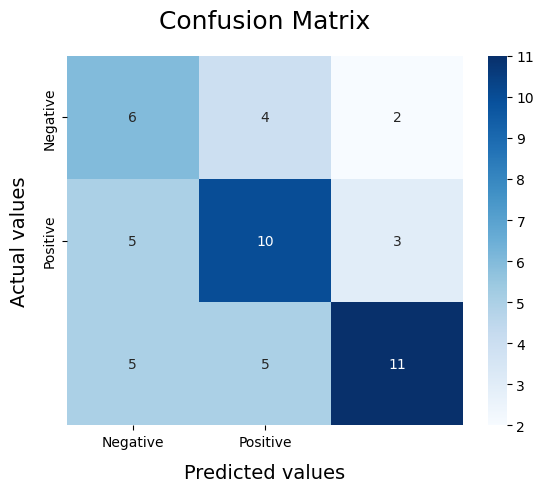

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train2, y_train)
model_Evaluate(LRmodel)
y_pred6 = LRmodel.predict(X_test2)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
accuracy=accuracy_score(y_test,y_pred6)
precision =precision_score(y_test,y_pred6,average='weighted')
recall= recall_score(y_test,y_pred6,average='weighted')
f1=f1_score(y_test,y_pred6,average='weighted')
accuracy,precision,recall,f1

(0.5294117647058824,
 0.5570820433436532,
 0.5294117647058824,
 0.5364524188053599)

In [ ]:
LRmodel.score(X_test2,y_test)

NameError: ignored

In [ ]:
LRmodel.score(X_train2,y_train)

NameError: ignored

In [ ]:
labels=train.pop("survived")

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=0.05)

NameError: ignored